In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_dataframes(file_pattern):
    return pd.concat([pd.read_csv(file) for file in glob.glob(file_pattern)], sort=False)


def aggregate_score(dataframe, func, name_column='Name'):
    return dataframe.groupby(name_column).agg(func).reset_index()


In [3]:
output_dir = 'config200'
dir_path = 'outputs/' + output_dir +'/'

df = read_dataframes(f'{dir_path}*.csv')
df_mean = aggregate_score(df, np.mean)
df_std = aggregate_score(df, np.std)

In [13]:
df.head()

,Name,Accuracy,Precision,Recall,F1,Cost,Savings
0,CI-LogisticRegression,0.999214,0.875000,0.636364,0.736842,36791.51,-0.523263
1,CI-DecisionTree,0.998952,0.704403,0.678788,0.691358,44249.12,-0.832027
2,CI-RandomForest,0.999392,0.908397,0.721212,0.804054,36071.77,-0.493464
3,CI-XGBoost,0.999392,0.879433,0.751515,0.810458,37934.34,-0.570579
4,CST-CostSensitiveLogisticRegression,0.056639,0.001664,0.909091,0.003322,18029226.64,-745.456318


In [5]:
df_mean.head()

,Name,Accuracy,Precision,Recall,F1,Cost,Savings
0,CI-DecisionTree,0.999097,0.739747,0.738909,0.738904,40268.4356,-0.997106
1,CI-DecisionTree-BMR,0.998331,0.641102,0.082909,0.146362,16077.2888,0.211036
2,CI-DecisionTree-TO,0.999097,0.739747,0.738909,0.738904,40268.4356,-0.997106
3,CI-LogisticRegression,0.999184,0.868134,0.623879,0.724999,34093.0004,-0.684670
4,CI-LogisticRegression-BMR,0.998386,0.775724,0.095030,0.168626,14556.5680,0.284704


In [6]:
results = pd.DataFrame(df_mean.Name.str.split('-').values.tolist(), columns=['Model class', 'Model', 'Extra model'])
results = pd.concat([df_mean, results], axis = 1)
results = results.drop(['Name'], axis = 1)

In [7]:
results.sort_values('Savings')

,Accuracy,Precision,Recall,F1,Cost,Savings,Model class,Model,Extra model
13,0.556060,0.003770,0.600364,0.007448,8.486462e+06,-413.467929,CST,CostSensitiveLogisticRegression,None
0,0.999097,0.739747,0.738909,0.738904,4.026844e+04,-0.997106,CI,DecisionTree,None
2,0.999097,0.739747,0.738909,0.738904,4.026844e+04,-0.997106,CI,DecisionTree,TO
9,0.999492,0.917360,0.777333,0.840999,3.439550e+04,-0.703047,CI,XGBoost,None
3,0.999184,0.868134,0.623879,0.724999,3.409300e+04,-0.684670,CI,LogisticRegression,None
6,0.999471,0.932926,0.748242,0.829949,3.315623e+04,-0.641329,CI,RandomForest,None
5,0.998911,0.870380,0.435152,0.574956,3.174503e+04,-0.565157,CI,LogisticRegression,TO
8,0.998915,0.978866,0.382667,0.541720,2.824458e+04,-0.390586,CI,RandomForest,TO
11,0.998814,0.961970,0.326303,0.429197,2.660528e+04,-0.307301,CI,XGBoost,TO
12,0.998271,0.000000,0.000000,0.000000,2.048991e+04,0.000000,CST,CostSensitiveDecisionTreeClassifier,None


In [8]:
results.sort_values(['Model', 'Savings'])

,Accuracy,Precision,Recall,F1,Cost,Savings,Model class,Model,Extra model
12,0.998271,0.000000,0.000000,0.000000,2.048991e+04,0.000000,CST,CostSensitiveDecisionTreeClassifier,None
13,0.556060,0.003770,0.600364,0.007448,8.486462e+06,-413.467929,CST,CostSensitiveLogisticRegression,None
0,0.999097,0.739747,0.738909,0.738904,4.026844e+04,-0.997106,CI,DecisionTree,None
2,0.999097,0.739747,0.738909,0.738904,4.026844e+04,-0.997106,CI,DecisionTree,TO
1,0.998331,0.641102,0.082909,0.146362,1.607729e+04,0.211036,CI,DecisionTree,BMR
3,0.999184,0.868134,0.623879,0.724999,3.409300e+04,-0.684670,CI,LogisticRegression,None
5,0.998911,0.870380,0.435152,0.574956,3.174503e+04,-0.565157,CI,LogisticRegression,TO
4,0.998386,0.775724,0.095030,0.168626,1.455657e+04,0.284704,CI,LogisticRegression,BMR
6,0.999471,0.932926,0.748242,0.829949,3.315623e+04,-0.641329,CI,RandomForest,None
8,0.998915,0.978866,0.382667,0.541720,2.824458e+04,-0.390586,CI,RandomForest,TO


In [9]:
df_std

,Name,Accuracy,Precision,Recall,F1,Cost,Savings
0,CI-DecisionTree,0.000108,0.034780,0.035505,0.030461,2.609725e+03,0.256886
1,CI-DecisionTree-BMR,0.000048,0.114674,0.016808,0.027983,2.241287e+03,0.079624
2,CI-DecisionTree-TO,0.000108,0.034780,0.035505,0.030461,2.609725e+03,0.256886
3,CI-LogisticRegression,0.000064,0.025677,0.041003,0.027487,2.343870e+03,0.168733
4,CI-LogisticRegression-BMR,0.000041,0.091715,0.019836,0.032348,1.795814e+03,0.068598
5,CI-LogisticRegression-TO,0.000144,0.033878,0.089299,0.084480,2.930476e+03,0.152324
6,CI-RandomForest,0.000062,0.023588,0.031793,0.021619,2.044526e+03,0.184635
7,CI-RandomForest-BMR,0.000039,0.082666,0.020613,0.032478,1.904532e+03,0.062756
8,CI-RandomForest-TO,0.000169,0.022333,0.108574,0.094293,3.010722e+03,0.141180
9,CI-XGBoost,0.000061,0.027296,0.030753,0.020120,2.129936e+03,0.195962


In [10]:
df.sort_values(['Name', 'Savings'])

,Name,Accuracy,Precision,Recall,F1,Cost,Savings
1,CI-DecisionTree,0.999036,0.706215,0.757576,0.730994,40011.87,-1.516688
1,CI-DecisionTree,0.999287,0.797546,0.787879,0.792683,36972.30,-1.502701
1,CI-DecisionTree,0.999151,0.762500,0.739394,0.750769,37308.01,-1.449895
1,CI-DecisionTree,0.999088,0.740741,0.727273,0.733945,36867.94,-1.422246
1,CI-DecisionTree,0.999057,0.741935,0.696970,0.718750,38443.66,-1.362888
1,CI-DecisionTree,0.999004,0.703488,0.733333,0.718101,41194.04,-1.335913
1,CI-DecisionTree,0.998879,0.659341,0.727273,0.691643,45863.40,-1.316153
1,CI-DecisionTree,0.999057,0.714286,0.757576,0.735294,42092.81,-1.279564
1,CI-DecisionTree,0.999235,0.767442,0.800000,0.783383,39413.38,-1.268292
1,CI-DecisionTree,0.999109,0.735294,0.757576,0.746269,38652.46,-1.231199


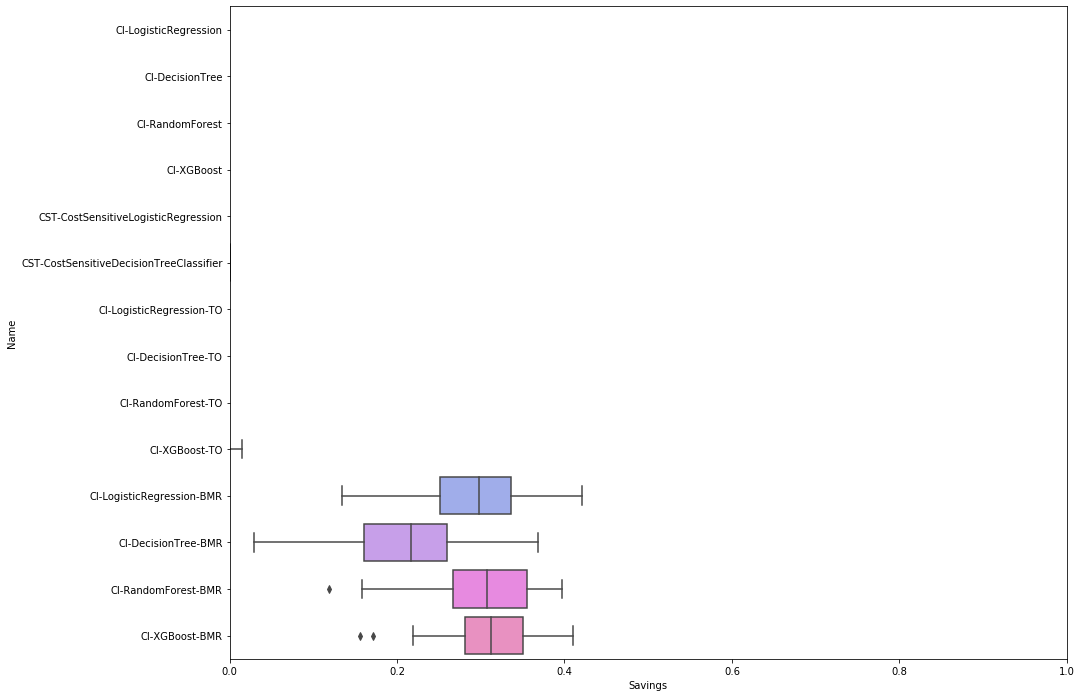

In [11]:
data = df #[df['Savings'] > 0]

fig, ax = plt.subplots(figsize = (15, 12))

sns.boxplot(x = 'Savings', y = 'Name', data = data, ax = ax)
ax.set_xlim([0, 1])
plt.show()